## Voedingsstoffen van vleesvervangers op de Nederlandse markt

De opmars van vleesvervangers is goed te zien in de schappen van de supermarkt. Dit is een goede ontwikkeling voor het milieu, maar ook voor onze gezondheid. Of zijn vleesvervangers wel zo goed als ze beweren. Er komen langzaamaan kritische geluiden over vleesvervangers en of ze daadwerkelijk wel gezond zijn. IJzer en sodium worden vaak toegevoegd aan vleesvervangers om de smaak en voedingsstoffen van vlees te imiteren. Hoe zit het met het sodiumgehalte van vleesvervangers op de Nederlandse markt? Welk product is aan te raden?


In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# wwww.miekedewaal.nl heeft al veel vleesvervangers gedocumenteerd. De gegevens van haar webiste 'scrape' ik om vervolgens te analyseren.

url = "https://www.miekedewaal.nl/koken/voedingswaarden/vleesvervangers.htm"
data = requests.get(url).text
soup = BeautifulSoup(data, "html5lib")
tables = soup.find_all('table')

In [103]:
product_data = pd.DataFrame(columns=["Name", "Brand", "Calories", "Protein", "Carbs", "Sugars", "Fats", "Sodium", "Iron"])

for index in range(2, len(tables)):
    nutrients_data = tables[index].tbody.find_all("tr")
    cal_data = nutrients_data[2].find_all("td")
    calories = cal_data[1].text.strip("kcal").strip("g").replace(",", ".")
    pro_data = nutrients_data[3].find_all("td")
    protein = pro_data[1].text.strip("kcal").strip("g").replace(",", ".")  
    carbs_data = nutrients_data[4].find_all("td")
    carbs = carbs_data[1].text.strip("kcal").strip("g").replace(",", ".")
    sugars_data = nutrients_data[5].find_all("td")
    sugars = sugars_data[1].text.strip("kcal").strip("g").replace(",", ".")
    fats_data = nutrients_data[6].find_all("td")
    fats = fats_data[1].text.strip("kcal").strip("g").strip("\n\t\t\t\t\t\t\t").replace(",", ".")
    sodium_data = nutrients_data[x].find_all("td")
    sodium = sodium_data[1].text.strip("kcal").strip("g").replace(",", ".")
    iron_data = nutrients_data[x].find_all("td")
    iron = iron_data[1].text.strip("kcal").strip("g").replace(",", ".")
    product_data = product_data.append({"Calories":calories, "Protein":protein, "Carbs":carbs, "Sugars":sugars, "Fats":fats, "Sodium":sodium, "Iron":iron}, ignore_index=True)


product_data.head()

,Name,Brand,Calories,Protein,Carbs,Sugars,Fats,Sodium,Iron
0,NaN,NaN,179,17.1,11.7,1.0,6.2,1.0,1.0
1,NaN,NaN,275,13.6,11.9,3.3,18.6,3.3,3.3
2,NaN,NaN,180,20,5.0,2.0,7.0,2.0,2.0
3,NaN,NaN,272,18,11.8,3.1,11.8,3.1,3.1
4,NaN,NaN,163,17.5,13,1.3,3.7,1.3,1.3


In [74]:
product_data.to_excel("missing_name.xlsx")

In het missing_name.xlsx heb ik de naam en merk handmatig toegevoegd. Deze eigenschappen zaten omslachtig in de html-code en het was efficiënter om dit handmatig te doen. Bij een grotere dataset zou ik dezelfde methode gebruiken als hierboven. 

In [5]:
source = "missing_name.xlsx"
df = pd.read_excel(source)

In [6]:
df.head()

,Unnamed: 0,Name,Brand,Calories,Protein,Carbs,Sugars,Fats,Sodium,Iron,Product
0,0,Vivera plant balletjes,Vivera,179,17.1,11.7,1.0,6.2,1.0,1.0,Balletjes
1,1,Vivera plant groenteballetjes,Vivera,275,13.6,11.9,3.3,18.6,3.3,3.3,Balletjes
2,2,Vegetarische balletjes,AH,180,20.0,5.0,2.0,7.0,2.0,2.0,Balletjes
3,3,Vegafit Balletjes,Vegafit,272,18.0,11.8,3.1,11.8,3.1,3.1,Balletjes
4,4,Vega balletjes,Lidl,163,17.5,13.0,1.3,3.7,1.3,1.3,Balletjes


In [7]:
df = df.sort_values('Brand')
df.head()

,Unnamed: 0,Name,Brand,Calories,Protein,Carbs,Sugars,Fats,Sodium,Iron,Product
37,37,Biologische tofu roerbakreepjes,AH,215,18.0,1.0,1.0,15.0,1.0,1.0,Kip/Wok
2,2,Vegetarische balletjes,AH,180,20.0,5.0,2.0,7.0,2.0,2.0,Balletjes
9,9,Biologische pompoen tijmburger,AH,170,5.0,19.0,4.0,7.5,4.0,4.0,Burger
39,39,Vegetatische wokstukjes,Chef Select,164,20.9,2.8,0.6,6.0,0.6,0.6,Kip/Wok
14,14,Vega burger deluxe mini,Garden Gourmet,158,17.0,8.7,3.2,5.0,3.2,3.2,Burger


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

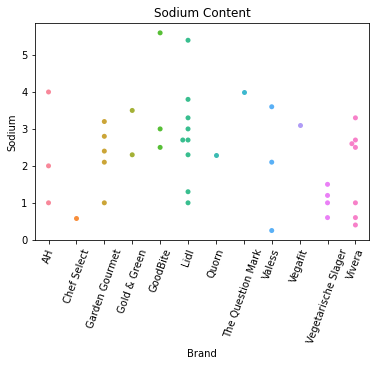

In [9]:
plot = sns.swarmplot(x="Brand", y='Sodium', data=df)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Sodium Content')
plt.show

Swarmplot geeft een overzicht van zoutverdeling over de verschillende merken. Er zit geen duidelijk verband in. Opmerking is dat 'De Vegatarische Slager' laag scoort met hun assortiment. 

In [10]:
# Index van product met laagste sodiumgehalte. 
df['Sodium'].idxmin()

36

In [196]:
min_sodium = df.loc[36]
min_sodium

Unnamed: 0                   36
Name          Valess Wokstukjes
Brand                    Valess
Calories                    210
Protein                    29.8
Carbs                       0.2
Sugars                     0.25
Fats                        5.0
Sodium                     0.25
Iron                       0.25
Product                 Kip/Wok
Name: 36, dtype: object

In [197]:
min_cal = df.loc[df['Calories'].idxmin()]
min_cal

Unnamed: 0                     29
Name          Vivera Plantspekjes
Brand                      Vivera
Calories                       96
Protein                      15.0
Carbs                         5.9
Sugars                        0.4
Fats                          0.5
Sodium                        0.4
Iron                          0.5
Product                      Spek
Name: 29, dtype: object

In [198]:
max_protein = df.loc[df['Protein'].idxmax()]
max_protein

Unnamed: 0                   36
Name          Valess Wokstukjes
Brand                    Valess
Calories                    210
Protein                    29.8
Carbs                       0.2
Sugars                     0.25
Fats                        5.0
Sodium                     0.25
Iron                       0.25
Product                 Kip/Wok
Name: 36, dtype: object

In [199]:
min_carbs = df.loc[df['Carbs'].idxmin()]
min_carbs

Unnamed: 0                   36
Name          Valess Wokstukjes
Brand                    Valess
Calories                    210
Protein                    29.8
Carbs                       0.2
Sugars                     0.25
Fats                        5.0
Sodium                     0.25
Iron                       0.25
Product                 Kip/Wok
Name: 36, dtype: object

In [200]:
min_fats = df.loc[df['Fats'].idxmin()]
min_fats

Unnamed: 0                     29
Name          Vivera Plantspekjes
Brand                      Vivera
Calories                       96
Protein                      15.0
Carbs                         5.9
Sugars                        0.4
Fats                          0.5
Sodium                        0.4
Iron                          0.5
Product                      Spek
Name: 29, dtype: object

## Beste opties:
### - Valess Wokstukjes
Laagste zout,
Wins at lowest sodium, lowest carbs and highest protein
### - Vivera plantspekjes (Bacon)
Wins at lowest calories and lowest fats

In [201]:
df2 = df.loc[df['Name'] == 'Vivera Plantspekjes']
df3 = df.loc[df['Name'] == 'Valess Wokstukjes']
df4 = df2.append(df3)
df4

,Unnamed: 0,Name,Brand,Calories,Protein,Carbs,Sugars,Fats,Sodium,Iron,Product
29,29,Vivera Plantspekjes,Vivera,96,15.0,5.9,0.40,0.5,0.40,0.50,Spek
36,36,Valess Wokstukjes,Valess,210,29.8,0.2,0.25,5.0,0.25,0.25,Kip/Wok


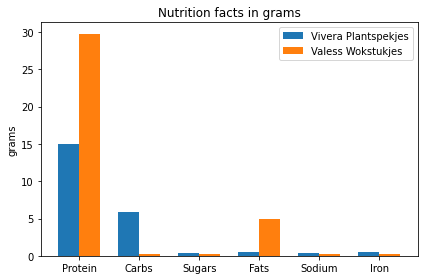

In [203]:
labels = ['Protein', 'Carbs', 'Sugars', 'Fats', 'Sodium', 'Iron']
vivera = [15, 5.9, 0.4, 0.5, 0.4, 0.5]
valess = [29.8, 0.2, 0.25, 5.0, 0.25, 0.25]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, vivera, width, label='Vivera Plantspekjes')
rects2 = ax.bar(x + width/2, valess, width, label='Valess Wokstukjes')

ax.set_ylabel('grams')
ax.set_title('Nutrition facts in grams')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()